In [1]:
% pylab inline
import pandas as pd
import numpy as np

import random
random.seed(42)

train = pd.read_csv("data/train.csv")
score = pd.read_csv("data/score.csv")
X_score = score.values[:,2:]
user_id = score.values[:,1]
X = train.values[:,3:]
y = train.values[:,2]

Populating the interactive namespace from numpy and matplotlib


In [2]:
score.head(1)

,row_number,user_id,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
0,1,5,29,1,36,23.785714,0.764706,9,0,9246,...,1,0,152,0,0,0,0,81,1,0.0


In [3]:
X_score

array([[ 29.,   1.,  36., ...,  81.,   1.,   0.],
       [ 22.,   1.,   2., ...,  79.,   0.,   0.],
       [ 22.,   0.,   9., ...,  62.,   1.,   0.],
       ..., 
       [ 21.,   0.,   6., ...,  23.,   1.,   0.],
       [ 21.,   1.,  17., ...,  29.,   0.,   0.],
       [ 18.,   1.,   8., ...,  13.,   0.,   0.]])

In [4]:
score.describe()

,row_number,user_id,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,86681.000000,8.668100e+04,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,...,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86680.000000
mean,43341.000000,8.568399e+05,24.012621,0.625108,19.330049,24.059611,0.617691,4.073292,0.440939,18057.370012,...,0.108617,-0.020350,932.254704,4.471534,0.133143,0.002457,1.171052,44.202293,0.353676,0.000265
std,25022.793679,4.941988e+05,6.393003,0.484098,73.992293,5.104065,0.318366,5.913118,1.966933,29152.584389,...,0.927222,0.568315,2763.441203,37.940155,7.466784,0.172407,22.990162,19.730629,0.478113,0.034804
min,1.000000,5.000000e+00,8.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,-30.000000,-14.000000,-104540.000000,-2230.000000,-9.000000,-8.000000,-423.000000,0.000000,0.000000,-1.000000
25%,21671.000000,4.279080e+05,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,1306.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,43341.000000,8.561090e+05,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,7640.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000
75%,65011.000000,1.287271e+06,26.000000,1.000000,19.000000,26.153846,0.900000,4.000000,0.000000,23327.000000,...,0.000000,0.000000,897.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000
max,86681.000000,1.708981e+06,79.000000,1.000000,10868.000000,79.000000,1.000000,138.000000,181.000000,899816.000000,...,56.000000,41.000000,112577.000000,4728.000000,1496.000000,33.000000,3272.000000,112.000000,1.000000,1.000000


In [5]:
train.head(1)

,row_number,user_id,adopter,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
0,1,10,0,24,0,20,26.333333,0.777778,6,0,...,0,0,54,0,0,0,0,79,0,0


In [6]:
train.describe()

,row_number,user_id,adopter,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,86682.000000,8.668200e+04,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,...,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,43341.500000,8.547774e+05,0.017766,23.993067,0.622217,18.988521,24.068308,0.617246,4.040147,0.434935,...,0.105847,-0.021054,942.677188,4.716723,0.279158,0.002757,0.954500,44.350061,0.352045,0.000242
std,25023.082354,4.938304e+05,0.132101,6.388225,0.484836,57.934430,5.127068,0.318587,5.843532,1.853233,...,0.843507,0.534960,2856.036359,155.648950,43.782235,0.177153,19.209259,19.707058,0.477611,0.034803
min,1.000000,1.000000e+01,0.000000,8.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,...,-29.000000,-18.000000,-135022.000000,-951.000000,-264.000000,-5.000000,-2752.000000,0.000000,0.000000,-1.000000
25%,21671.250000,4.279675e+05,0.000000,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,43341.500000,8.520060e+05,0.000000,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000
75%,65011.750000,1.282592e+06,0.000000,26.000000,1.000000,18.000000,26.157895,0.900000,4.000000,0.000000,...,0.000000,0.000000,913.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000
max,86682.000000,1.708942e+06,1.000000,79.000000,1.000000,6437.000000,77.000000,1.000000,122.000000,225.000000,...,41.000000,19.000000,217876.000000,44900.000000,12702.000000,20.000000,2036.000000,112.000000,1.000000,1.000000


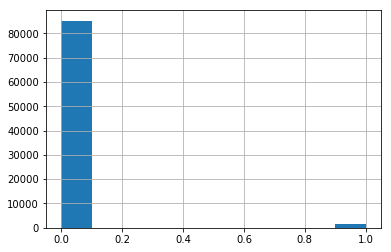

In [7]:
train.adopter.hist()

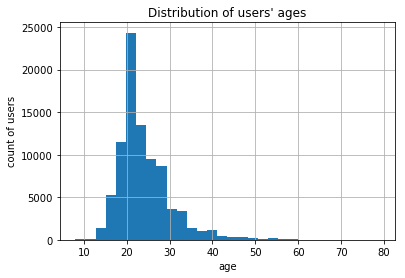

In [8]:
train.age.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

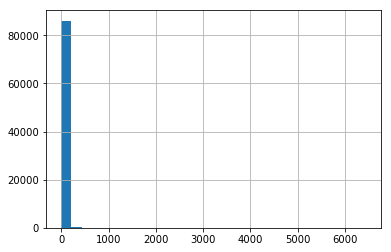

In [9]:
train.friend_count.hist(bins=30)

In [34]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

(array([ 8524.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   145.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

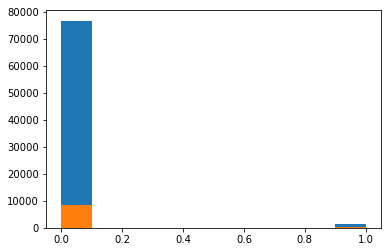

In [35]:
plt.hist(y_train)
plt.hist(y_test)

(array([ 1395.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1395.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

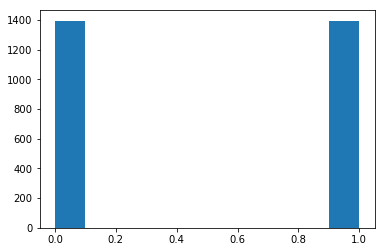

In [36]:
from imblearn.under_sampling import RandomUnderSampler

s = RandomUnderSampler()
X_sampled, y_sampled = s.fit_sample(X_train, y_train)
plt.hist(y_sampled)

In [37]:
from sklearn.preprocessing import RobustScaler
from scipy import stats
# Scale data
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
data = pd.DataFrame(data=X_train)
data.columns = train.columns[3:]
data.describe()

,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,loved_tracks,posts,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,...,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000
mean,0.165703,-0.378052,0.800561,0.197083,-0.104487,0.678673,0.435133,0.468455,1.014416,6.118839,...,0.107136,-0.022048,1.031116,4.757117,0.300040,0.002807,0.965813,-0.023002,0.353005,0.000256
std,1.066817,0.484904,3.927753,0.947099,0.675656,1.949058,1.867019,1.291935,4.441451,163.248138,...,0.834022,0.530127,3.074509,163.594022,46.141655,0.172092,19.859851,0.679497,0.477907,0.034711
min,-2.500000,-1.000000,-0.400000,-2.590747,-1.414141,-0.666667,0.000000,-0.350072,-0.205479,0.000000,...,-29.000000,-18.000000,-148.050439,-951.000000,-264.000000,-5.000000,-2752.000000,-1.551724,0.000000,-1.000000
25%,-0.500000,-1.000000,-0.266667,-0.416370,-0.505051,-0.333333,0.000000,-0.289507,-0.191781,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.517241,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,0.733333,0.583630,0.494949,0.666667,0.000000,0.710493,0.808219,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.482759,1.000000,0.000000
max,9.333333,0.000000,428.666667,9.992883,0.707071,40.000000,225.000000,41.153258,772.246575,25815.000000,...,41.000000,17.000000,238.899123,44900.000000,12702.000000,20.000000,2036.000000,2.310345,1.000000,1.000000


In [38]:
# Scale data
robust_scaler = RobustScaler()
X_feature = robust_scaler.fit_transform(X_sampled)
data = pd.DataFrame(data=X_feature)
data.columns = train.columns[3:]
data.describe()

,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,loved_tracks,posts,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,...,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000
mean,0.291935,-0.323656,0.714232,0.169852,-0.106489,0.508100,0.924373,0.385987,0.754097,10.619355,...,0.223297,-0.044444,0.652226,2.257079,0.262007,0.007885,3.202509,-0.043839,0.307527,-0.000717
std,1.104545,0.467954,2.691189,0.895358,0.774542,1.539251,2.474180,1.213347,2.289788,96.208592,...,1.187947,0.818942,1.919805,9.571012,6.365284,0.210709,43.666122,0.687238,0.461552,0.046377
min,-1.833333,-1.000000,-0.416667,-1.753139,-1.796420,-0.600000,0.000000,-0.487208,-0.259494,0.000000,...,-9.000000,-14.000000,-20.026660,-89.750000,0.000000,-3.000000,-81.000000,-1.413793,0.000000,-1.000000
25%,-0.333333,-1.000000,-0.291667,-0.430214,-0.527258,-0.400000,0.000000,-0.366346,-0.227848,0.000000,...,0.000000,0.000000,-0.136888,0.000000,0.000000,0.000000,0.000000,-0.551724,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.000000,0.708333,0.569786,0.472742,0.600000,1.000000,0.633654,0.772152,1.000000,...,0.000000,0.000000,0.863112,1.000000,0.000000,0.000000,0.000000,0.448276,1.000000,0.000000
max,9.000000,0.000000,60.333333,7.005537,0.898210,16.000000,37.000000,10.935577,46.797468,3125.000000,...,17.000000,8.000000,34.320943,147.500000,281.000000,5.000000,2036.000000,2.103448,1.000000,1.000000


In [39]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support, classification_report

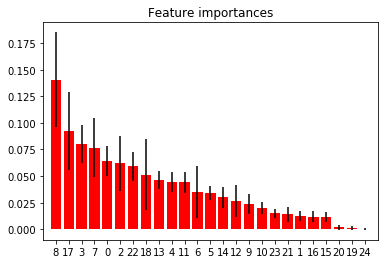

Precision:0.0175995383728 Recall:0.841379310345, FScore:0.0344778861099
[[1714 6810]
 [  23  122]]


In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_adopter = RandomForestClassifier(n_estimators=45, random_state=42)
forest_adopter.fit(X_feature, y_sampled)
importances = forest_adopter.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_adopter.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

y_pred = forest_adopter.predict(X_test)
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

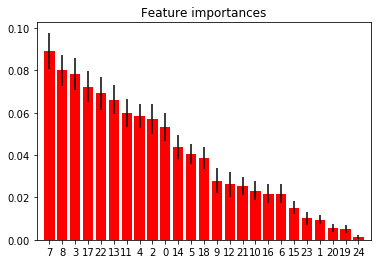

Precision:0.0114942528736 Recall:0.00689655172414, FScore:0.00862068965517
[[8438   86]
 [ 144    1]]


In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_nonadopter = RandomForestClassifier(n_estimators=45, random_state=42)
forest_nonadopter.fit(X_train, y_train)
importances = forest_nonadopter.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_nonadopter.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

y_pred = forest_nonadopter.predict(X_test)
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

In [42]:
top_feature_count = 15
arr_adopter = forest_adopter.feature_importances_
top_features_adopter = arr_adopter.argsort()[-top_feature_count:][::-1]

arr_nonadopter = forest_nonadopter.feature_importances_
top_features_nonadopter = arr_nonadopter.argsort()[-top_feature_count:][::-1]

top_features = list(set(top_features_nonadopter)|set(top_features_adopter))

train_top_features = map(lambda x: x+3, top_features)
score_top_features = map(lambda x: x+2, top_features)

print train_top_features
print score_top_features

X_score = score.values[:,score_top_features]

[3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 20, 21, 25]
[2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 19, 20, 24]


In [43]:
data2 = pd.DataFrame(data=X_score)
data2.columns = train.columns[train_top_features]
data2.describe()

,age,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,loved_tracks,posts,shouts,delta_friend_cnt,delta_avg_friend_age,delta_avg_friend_male,delta_songs_listened,delta_loved_tracks,tenure
count,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000
mean,24.012621,19.330049,24.059611,0.617691,4.073292,0.440939,18057.370012,92.552266,5.521175,31.698319,0.896932,0.270479,-0.000243,932.254704,4.471534,44.202293
std,6.393003,73.992293,5.104065,0.318366,5.913118,1.966933,29152.584389,379.560208,80.306180,193.717694,8.923235,0.719881,0.050965,2763.441203,37.940155,19.730629
min,8.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-211.000000,-48.833333,-1.000000,-104540.000000,-2230.000000,0.000000
25%,20.000000,3.000000,20.750000,0.428571,1.000000,0.000000,1306.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,23.000000,7.000000,23.000000,0.666667,2.000000,0.000000,7640.000000,15.000000,0.000000,4.000000,0.000000,0.244444,0.000000,0.000000,0.000000,44.000000
75%,26.000000,19.000000,26.153846,0.900000,4.000000,0.000000,23327.000000,75.000000,0.000000,15.000000,0.000000,0.447205,0.000000,897.000000,0.000000,59.000000
max,79.000000,10868.000000,79.000000,1.000000,138.000000,181.000000,899816.000000,59328.000000,11245.000000,20608.000000,880.000000,28.000000,1.000000,112577.000000,4728.000000,112.000000


In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="gini", max_features="log2", n_estimators=45)
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("random_forest")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0407239819005 Recall:0.0620689655172, FScore:0.0491803278689
[[8312  212]
 [ 136    9]]


In [45]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("extra_trees")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0333333333333 Recall:0.00689655172414, FScore:0.0114285714286
[[8495   29]
 [ 144    1]]


In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("k_neighbors")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0 Recall:0.0, FScore:0.0
[[8524    0]
 [ 145    0]]


In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("discriminant_analysis")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0178151676358 Recall:0.993103448276, FScore:0.0350024307244
[[ 585 7939]
 [   1  144]]


In [48]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("naive_bayes")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0167359187442 Recall:1.0, FScore:0.0329208763764
[[   5 8519]
 [   0  145]]


In [49]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("ada_boost")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0460034502588 Recall:0.551724137931, FScore:0.0849256900212
[[6865 1659]
 [  65   80]]
